In [110]:
import numpy as np
import gensim
import os
import spacy
import re

import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning, module='gensim')

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

import ast

In [5]:
#the data is a list of dictionaries stored in a text file 
# ast just has them read in as a literal value instead of a string
data=ast.literal_eval(open('toy_data (1)', 'r').read())

In [9]:
comments=pd.DataFrame(data)
comments.head(2)

,user,comment
0,yagurastation,Anyone interested should also check out the op...
1,simonebrunozzi,"For people living in the US like me, this is w..."


In [58]:
stops=[x for x in STOPWORDS]
type(stops)

list

In [59]:
#create tokens from comments
def tokenize(data):
    comm=data.lower()
    comm=re.sub(r'[^a-zA-Z ^0-9]', '', comm)
    stops=[x for x in STOPWORDS]
    stops= stops + [' ']
    return [token for token in comm.split(' ') if token not in stops]
comments['tokens']=comments['comment'].apply(tokenize)

In [60]:
#create the dictionary
id2word=corpora.Dictionary(comments['tokens'])

In [61]:
#look at how many keys there are
len(id2word.keys())

1439

In [62]:
#filters for anything 
id2word.filter_extremes(no_below=2)

In [63]:
len(id2word.keys())

398

In [64]:
corpus=[id2word.doc2bow(text) for text in comments['tokens']]

In [65]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 15,
                   passes=10,
                   workers=6
                  )


/Users/eyvonnegeordan/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/eyvonnegeordan/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/eyvonnegeordan/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator))

In [69]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]
for t in topics:
    print(f"'{t}'")
    print()

' iq measure test better'

'pollution iq air noise quality'

'iq tests wouldnt use results'

'pollution bad air returns dont'

'air buy filter test pollution'

' air filtration tests factor'

'air project citizen source science'

'like know im original post'

' time correlation tests dont'

'thread air dont original noise'

' like iq field different'

' mask air indoor work'

'people iq like waste '

' measure im reliable iq'

'isnt mondays stock device plants'



In [67]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [68]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/Users/eyvonnegeordan/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.042626  0.176114       1        1  11.964228
2     -0.055185 -0.025365       2        1  10.997319
1      0.041757 -0.071980       3        1  10.038287
10    -0.113610  0.055223       4        1   9.510489
8     -0.150950 -0.065735       5        1   8.168692
12    -0.063807 -0.011702       6        1   7.558457
5      0.046533  0.035169       7        1   5.996962
0     -0.092540 -0.117969       8        1   5.916415
11     0.151863 -0.038443       9        1   5.676126
3      0.061293  0.131892      10        1   5.612979
6      0.161632 -0.074473      11        1   5.234883
7     -0.038312 -0.065968      12        1   3.984220
14     0.003739  0.107285      13        1   3.884932
13     0.031981 -0.038455      14        1   2.822256
9      0.058231  0.004406      15        1   2.633750, topic_info=    Category       Freq       Term      Total  loglift  logprob
25   Default  42.000000             42.000000  30.0000  30.0000
11   Default  17.000000       like  17.000000  29.0000  29.0000
71   Default  33.000000         iq  33.000000  28.0000  28.0000
14   Default  20.000000  pollution  20.000000  27.0000  27.0000
327  Default   5.000000    measure   5.000000  26.0000  26.0000
..       ...        ...        ...        ...      ...      ...
215  Topic15   0.682981   original   5.898470   1.4808  -4.1027
33   Topic15   0.682981      awair   6.272517   1.4193  -4.1027
15   Topic15   0.683111        air  27.816484  -0.0700  -4.1025
38   Topic15   0.682981       pm25   7.017853   1.3070  -4.1027
17   Topic15   0.682981       dont  13.521167   0.6512  -4.1027

[676 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
25        1  0.047319       
25        2  0.047319       
25        4  0.189278       
25        5  0.189278       
25        6  0.047319       
...     ...       ...    ...
93        7  0.515489  youre
93        8  0.257745  youre
93        9  0.257745  youre
32        7  0.453455  youve
32       14  0.453455  youve

[990 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 11, 9, 13, 6, 1, 12, 4, 7, 8, 15, 14, 10])

In [91]:
def ldaModel(comments, id2word, num_topics=15, n_jobs=6):
    '''this takes in a dataframe that has a column named "comments" and creates an LDA model
    and returns it for further use. id2word is a gensim dictionary, Num_topics is the number of topics to use and n_jobs is
    the number of cores on CPU to use. n_jobs cannot be -1'''
    
    #clean and tokenize the data a little
    def tokenize(data):
        comm=data.lower()
        comm=re.sub(r'[^a-zA-Z ^0-9]', '', comm)
        stops=[x for x in STOPWORDS]
        stops= stops + [' ']
        return [token for token in comm.split(' ') if token not in stops]
    comments['tokens']=comments['comment'].apply(tokenize)
    
    #set up dictionary
    id2word=corpora.Dictionary(comments['tokens'])
    
    #prune dictionary
    id2word.filter_extremes(no_below=2)
    
    #create the corpus
    corpus=[id2word.doc2bow(text) for text in comments['tokens']]
    
    #create and run the LDA Model
    lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = num_topics,
                   passes=10,
                   workers=n_jobs
                  )
    
    return lda

In [92]:
def print_topics(lda):
    words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
    topics = [' '.join(t[0:5]) for t in words]
    for t in topics:
        print(f"'{t}'")
        print()

In [93]:
lda, id2word=ldaModel(comments)

/Users/eyvonnegeordan/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/eyvonnegeordan/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/Users/eyvonnegeordan/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator))

In [75]:
print_topics(lda)

' iq measure test better'

'pollution iq air noise quality'

'iq tests wouldnt use results'

'pollution bad air returns dont'

'air buy filter test pollution'

' air filtration tests factor'

'air project citizen source science'

'like know im original post'

' time correlation tests dont'

'thread air dont original noise'

' like iq field different'

' mask air indoor work'

'people iq like waste '

' measure im reliable iq'

'isnt mondays stock device plants'



In [79]:
# Shows which topics match with which items in the corpus
# could be done with any string that has been passed through the doc2bow function
lda[corpus[0]]

[(6, 0.9222222)]

In [80]:
# creates a dense matrix of the topics
dense=[lda[d] for d in corpus]

In [81]:
#creates the sparse matrix
def to_sparse(doc):
    d_dist={k:0 for k in range(0,15)} # that big number needs to match number of topics
    for t in doc:
        d_dist[t[0]] = t[1] #the doc will be a dense matrix, pull out the values
    return d_dist
sparse=[to_sparse(d) for d in dense]

In [88]:
#create a dataframe of each comment with the user as the index 
df=pd.DataFrame(sparse, index=comments['user'])
df.columns=topics
df.head()

,iq measure test better,pollution iq air noise quality,iq tests wouldnt use results,pollution bad air returns dont,air buy filter test pollution,air filtration tests factor,air project citizen source science,like know im original post,time correlation tests dont,thread air dont original noise,like iq field different,mask air indoor work,people iq like waste,measure im reliable iq,isnt mondays stock device plants
user,,,,,,,,,,,,,,,
yagurastation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.922222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
simonebrunozzi,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.813333,0.013333,0.013333
QuanticSausage,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.915151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ketzo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.922222,0.000000
Scene_Cast2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.906667,0.000000,0.000000,0.000000,0.000000,0.000000


In [90]:
df.groupby('user').mean()

,iq measure test better,pollution iq air noise quality,iq tests wouldnt use results,pollution bad air returns dont,air buy filter test pollution,air filtration tests factor,air project citizen source science,like know im original post,time correlation tests dont,thread air dont original noise,like iq field different,mask air indoor work,people iq like waste,measure im reliable iq,isnt mondays stock device plants
user,,,,,,,,,,,,,,,
11235813213455,0.000000,0.000000,0.000000,0.000000,0.000000,0.295239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.580952,0.000000,0.000000
4ec0755f5522,0.022222,0.022222,0.022222,0.022222,0.688889,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222,0.022222
9dl,0.251111,0.247222,0.016667,0.141667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.141667
BurningFrog,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.813333,0.013333,0.013333
CelestialTeapot,0.000000,0.953333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wizzwizz4,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.844444,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111
yagurastation,0.000000,0.041156,0.000000,0.000000,0.000000,0.000000,0.862211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
yissp,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.813333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333


In [101]:
def tokenize(data):
        comm=data.lower()
        comm=re.sub(r'[^a-zA-Z ^0-9]', '', comm)
        stops=[x for x in STOPWORDS]
        stops= stops + ['']
        return [token for token in comm.split(' ') if token not in stops]

In [102]:
def user_means(userComments, id2word, lda):
    '''userComments should be a list of comments from a single user that you want to get the
    average topic scores for, id2word is a dictionary object, lda is an LDA object'''
    #create the corpus for the current set of comments
    corp=[id2word.doc2bow(tokenize(x)) for x in userComments]
    
    # creates a dense matrix of the topics
    dense=[lda[d] for d in corpus]
    
    #creates a sparse matrix
    def to_sparse(doc):
        d_dist={k:0 for k in range(0,15)} # that big number needs to match number of topics
        for t in doc:
            d_dist[t[0]] = t[1] #the doc will be a dense matrix, pull out the values
        return d_dist
    sparse=[to_sparse(d) for d in dense]
    
    #get the topics
    words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
    topics = [' '.join(t[0:5]) for t in words]
    
    #create a dataframe of each comment with the user as the index 
    df=pd.DataFrame(sparse)
    df.columns=topics
    
    #return a 1 row dataframe with the mean score for each topic for the user
    return df.mean()

In [100]:
user_means(comments, id2word, lda).sort_values()

 measure im reliable iq               0.036301
thread air dont original noise        0.038455
pollution bad air returns dont        0.046869
isnt mondays stock device plants      0.048670
 iq measure test better               0.050545
like know im original post            0.051982
 like iq field different              0.057013
 mask air indoor work                 0.062872
air project citizen source science    0.066551
 time correlation tests dont          0.067903
 air filtration tests factor          0.076568
pollution iq air noise quality        0.079442
people iq like waste                  0.081267
iq tests wouldnt use results          0.089003
air buy filter test pollution         0.096036
dtype: float64

In [103]:
from gensim.models.coherencemodel import CoherenceModel

In [112]:
def compute_cv(dictionary, corpus, comments, limit, start=2, step=3, passes=5, n_jobs=6):
    '''
    compute the coherence values for a various number of topics 
    parameters:
    dictionary: a gensim dictionary object
    corpus: a generated gensim corpus obj
    comments: the collection of comments that we're working from 
    limit: max num of topics
    passes: number of times to run the model
    
    returns: coherence_values: a dataframe of the coherence values'''
    
    coherence_values=[]
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model=LdaMulticore(corpus=corpus,
                               id2word=dictionary,
                               num_topics=num_topics,
                               workers=n_jobs
                               )
            coherence = CoherenceModel(model=model,
                                       dictionary=dictionary, 
                                       corpus=corpus, 
                                       coherence='u_mass')
            coherence_values.append({'pass': iter_,
                                     'num_topics': num_topics,
                                     'coherence_score': coherence.get_coherence()})
    return pd.DataFrame(coherence_values)

In [113]:
def get_dict_corpus(comments):
    '''takes in a cleaned dataframe of comments with a tokens column
    returns a gensim dictionary object and a corpus of those words'''
    id2word=corpora.Dictionary(comments['tokens'])
    id2word.filter_extremes(no_below=2)
    corpus=[id2word.doc2bow(text) for text in comments['tokens']]
    return id2word, corpus

In [114]:
id2word, corpus=get_dict_corpus(comments)

In [119]:
coherence=compute_cv(id2word, corpus, comments, 40)

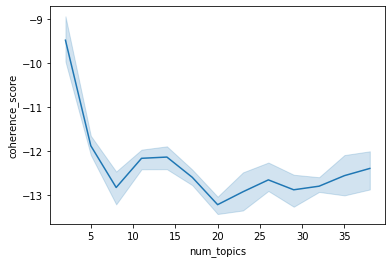

In [120]:
import seaborn as sns

ax=sns.lineplot(x='num_topics', y='coherence_score', data=coherence)

In [123]:
coherence.sort_values(by='coherence_score', ascending=False).head(10)

,pass,num_topics,coherence_score
13,1,2,-8.682189
26,2,2,-8.973834
39,3,2,-9.662985
0,0,2,-10.033329
52,4,2,-10.038891
1,0,5,-11.513542
53,4,5,-11.646631
56,4,14,-11.704791
37,2,35,-11.831426
21,1,26,-11.855478
